<a href="https://colab.research.google.com/github/gauravpatil97886/Machine-learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
# for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# 1. Problem Statement

In [ ]:
To predict Sepallength values from other independant variable

Dependant variable >> Sepal Length

# 2. Data Gathering

In [ ]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Exploratory Data Analysis (EDA)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 6)

In [ ]:
column_count = df.shape[1]
column_count

6

In [ ]:
row_count = df.shape[0]
row_count

150

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## 1.Id Variable

In [ ]:
df["Id"].nunique()

150

In [ ]:
df.drop('Id', axis=1, inplace=True)

NameError: ignored

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Species variable

In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df["Species"].replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2 }, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

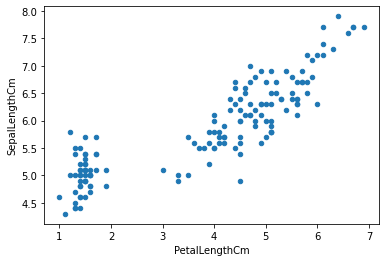

In [ ]:
df.plot(x="PetalLengthCm", y="SepalLengthCm", kind= "scatter" )

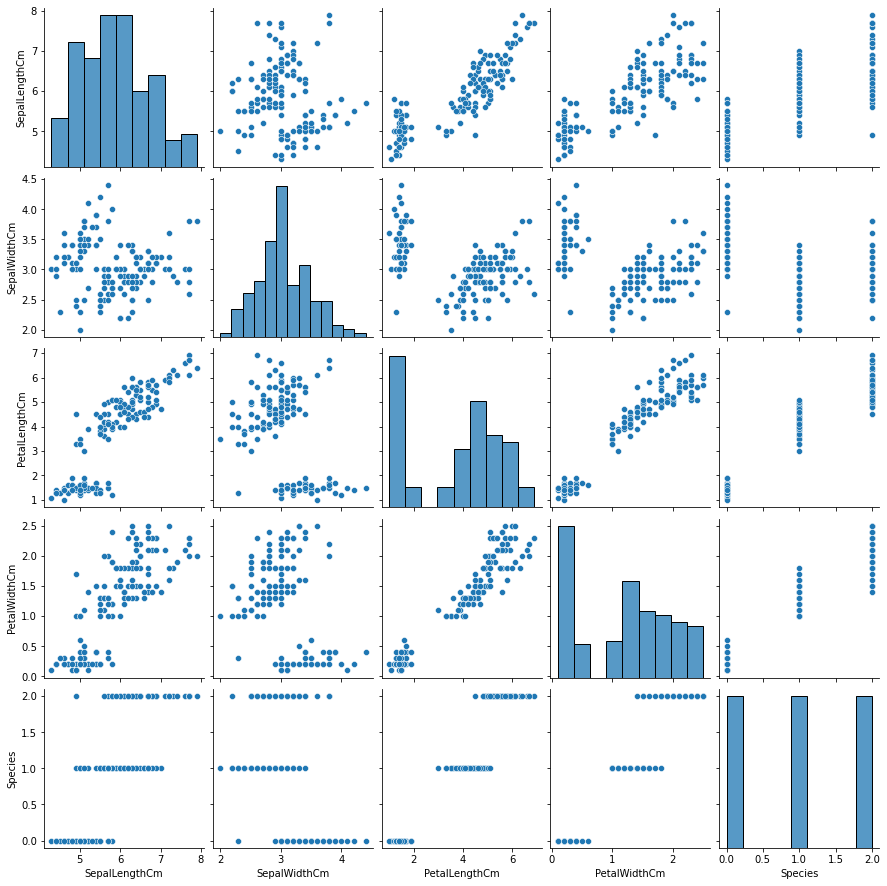

In [ ]:
sns.pairplot(df)

<AxesSubplot:>

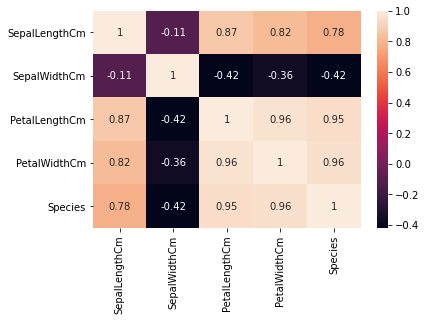

In [ ]:
sns.heatmap(df.corr(), annot= True)

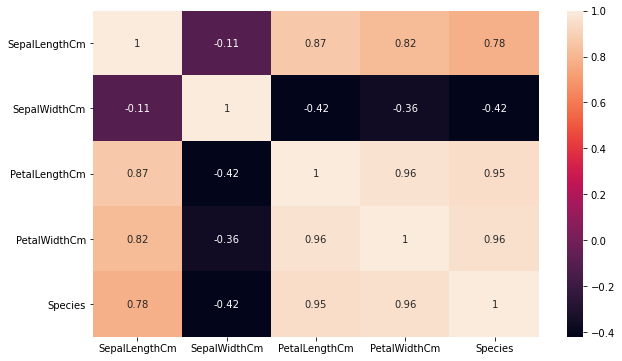

In [ ]:
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(), annot= True)
plt.savefig("Correlation_matrix.png")

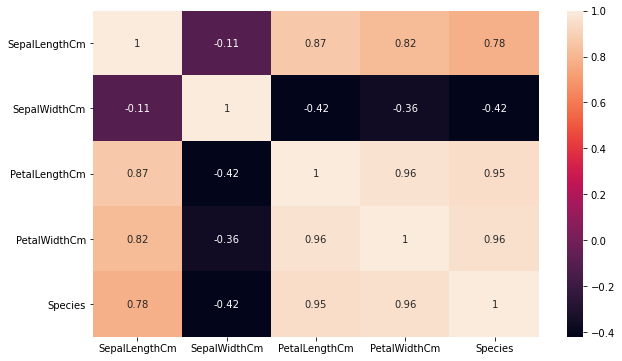

In [ ]:
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(), annot= True)
plt.savefig("Correlation_matrix.jpg")

<AxesSubplot:>

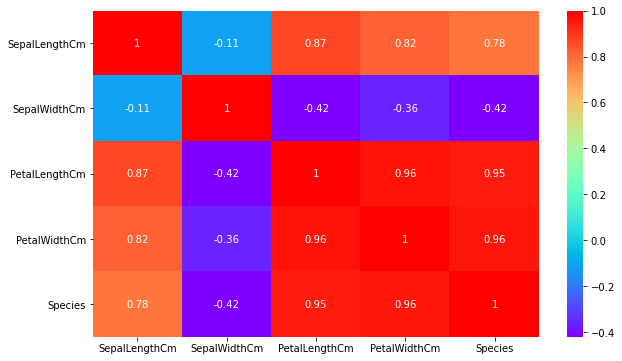

In [ ]:
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(), annot= True, cmap="rainbow")

## 4. Feature Engineering

In [ ]:
Scaling 
Binning
Outliers
missing values


## 5. Feature Selection

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df.drop("SepalLengthCm", axis=1)
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [ ]:
y = df["SepalLengthCm"] #1D
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

## 6. Model Building (Model Training)

### 6.1 Splitting dataset into train and test

In [ ]:
x_train,x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2) # returns 4 values
x_train

NameError: ignored

In [ ]:
x_train,x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state=1) # random_state= training data will be constant
x_train

NameError: ignored

In [ ]:
y_train

In [ ]:
x_train,x_test, 
y_train, y_test

### 6.2 Create Model Instance

In [ ]:
lr_model = LinearRegression()

### 6.3 Model Training

In [ ]:
lr_model.fit(x_train, y_train) # it is use to train the models

## 7. Model Evaluation

In [ ]:
y_pred = lr_model.predict(x_test)
y_pred[0:5] # Predicted values

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147])

In [ ]:
y_test[0:5] # Actual y Values

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
Name: SepalLengthCm, dtype: float64

### 7.1 Residual

In [ ]:
residual = y_test - y_pred
residual

### 7.2 MSE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE is:", mse)

MSE is: 0.15781531046414607


### 7.3. RMSE

In [ ]:
rmse = np.sqrt(mse)
print("RMSE is:", rmse)

RMSE is: 0.39725975188048696


### 7.4 R2 Score

In [ ]:
r2_value = r2_score(y_test, y_pred)
print("R2 Score is:", r2_value)

R2 Score is: 0.7588110183264593


In [ ]:
lr_model.score(x_test, y_test) # need to pass testing value

0.7588110183264593

### 7.5. Adjusted R2 Score

In [ ]:
adjusted_R2 = 1 - (1-r2_value) * (x.shape[0]-1)/(x.shape[0] - x.shape[1]-1)
adjusted_R2

0.7521575291768443

### 7.6 MAE

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.3232781241570906

# Most IMP Home Work

In [ ]:
when to use MSE, RMSE, MAE, RMAE, R2 score and Adjusted R2 Score and when to use what 

In [ ]:
List of concept to be prepared

In [ ]:
types of gradient descent

In [ ]:
Jira : Project management tool